![image](screenshot.png)

# Time-series Forecasting

## Description
The data consists of 52,416 observations of energy consumption on a 10-minute window. Every observation is described by the following feature columns.

Your task is to **aggregate the observations on an interval of 2 hours**. For this time interval, using the values of the **4 previous time intervals**, forecast the target value one step in the future. Choose which features you are going to use.

**You must train a Boosting model for the task. Choose the model based on the number, and type of features available.**



Features:

* Date: Time window of ten minutes.
* Temperature: Weather Temperature.
* Humidity: Weather Humidity.
* WindSpeed: Wind Speed.
* GeneralDiffuseFlows: “Diffuse flow” is a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna.
* DiffuseFlows

Target:

SolarPower

## Dataset links:
* [DS1](https://drive.google.com/file/d/1-Pcpb1xWpKc8Cgs-P7xqBFHw2NM0dBsA/view?usp=sharing)
* [DS2](https://drive.google.com/file/d/1-Pul07w6LXpm-uo99qbNc86FHhwl4yQD/view?usp=sharing)

In [17]:
# Add as many imports as you need.
# Write your code here. Add as many boxes as you need.

# Add as many imports as you need.
# Add as many imports as you need.
import pandas as pd

from VNP.packages.data_alalysis import *
from VNP.packages.data_preperation import *
from VNP.packages.missing_values import *
from VNP.packages.visualization import *
from VNP.packages.models import *
from VNP.packages.evaluation import *
from VNP.packages.vnp_ez import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from keras.api.models import Sequential
from keras.api.layers import Input, LSTM, Dense
import keras

## Read the datasets

In [7]:
pd_target = pd.read_csv("../data/power_consumption_g3.csv")

In [8]:
pd_target

,Date,SolarPower
0,2017-06-22 11:50:00,35818.80795
1,2017-04-24 22:50:00,34628.20237
2,2017-11-05 09:00:00,22781.53846
3,2017-10-19 23:20:00,31925.77681
4,2017-03-25 17:10:00,30246.12766
...,...,...
52411,2017-02-08 16:10:00,31808.13559
52412,2017-07-04 17:40:00,35816.61130
52413,2017-07-02 17:00:00,31185.64784
52414,2017-08-02 16:40:00,39463.35183


In [10]:
pd_features = pd.read_csv("../data/power_consumption_g3_feat.csv")

In [11]:
pd_features

,Date,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,2017-03-01 16:40:00,21.33,55.91,0.080,387.400,427.300
1,2017-07-27 06:30:00,23.10,48.58,4.908,10.450,8.630
2,2017-10-11 19:00:00,23.10,59.82,0.084,0.446,0.322
3,2017-02-10 06:50:00,12.25,80.80,4.916,0.051,0.111
4,2017-03-06 16:00:00,15.62,59.38,0.075,533.400,579.900
...,...,...,...,...,...,...
52411,2017-05-14 02:20:00,23.58,43.10,0.075,0.110,0.122
52412,2017-11-17 19:20:00,17.30,76.50,0.075,0.040,0.148
52413,2017-03-21 12:10:00,17.90,50.28,0.081,837.000,296.700
52414,2017-07-28 05:10:00,25.23,61.32,4.907,0.091,0.119


In [12]:
pd_features["Date"] = pd.to_datetime(pd_features["Date"])
pd_features.set_index(keys=["Date"], inplace=True)
pd_features.sort_index(inplace=True)
pd_features

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Date,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085
...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074


In [13]:
pd_target["Date"] = pd.to_datetime(pd_target["Date"])
pd_target.set_index(keys=["Date"], inplace=True)
pd_target.sort_index(inplace=True)
pd_target

,SolarPower
Date,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:40:00,27335.69620
...,...
2017-12-30 23:10:00,31160.45627
2017-12-30 23:20:00,30430.41825
2017-12-30 23:30:00,29590.87452


## Merge the datasets (and pre-processing if needed)

In [20]:
df = pd.merge(left=pd_features, right=pd_target, left_index=True, right_index=True)

In [21]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096,31160.45627
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452


In [22]:
df_grouped = df.groupby(pd.Grouper(freq="2H")).mean()

C:\Users\User-PC\AppData\Local\Temp\ipykernel_25332\3294429598.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_grouped = df.groupby(pd.Grouper(freq="2H")).mean()


In [23]:
df_grouped

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,5.874636,76.154545,0.081917,0.060167,0.105667,26927.594937
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872
...,...,...,...,...,...,...
2017-12-30 14:00:00,14.513333,39.486364,0.077667,409.650000,42.163333,29293.789606
2017-12-30 16:00:00,14.015000,43.236364,0.077500,153.905000,152.368333,31262.864386
2017-12-30 18:00:00,10.112500,60.239091,0.075583,1.618917,1.676750,37721.673005


In [24]:
df_grouped.isna().sum()

Temperature            2
Humidity               0
WindSpeed              2
GeneralDiffuseFlows    0
DiffuseFlows           0
SolarPower             0
dtype: int64

In [42]:
df_grouped.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'SolarPower'],
      dtype='object')

In [28]:
features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows']
target = "SolarPower"

In [29]:
df_1 = df_grouped.copy()

In [30]:
for feature in features:
    df_1[feature] = df_1[feature].interpolate(method="linear")

In [31]:
df_1.isna().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
SolarPower             0
dtype: int64

## Group the datasets into time intervals of 2 hours

<Axes: >

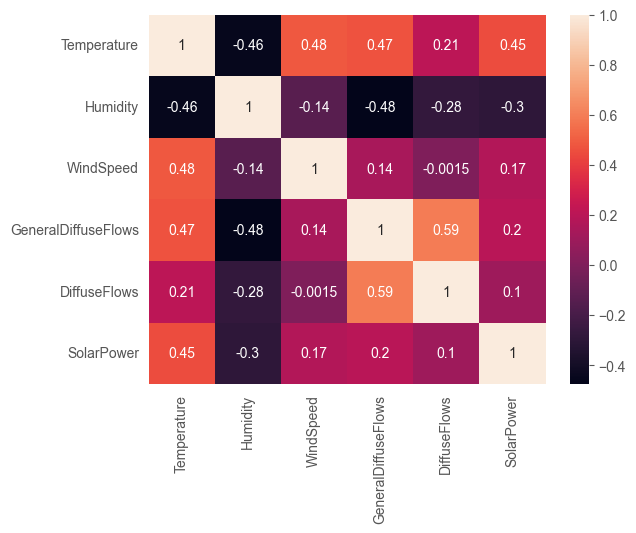

In [34]:
sns.heatmap(df_1.corr(), annot=True)

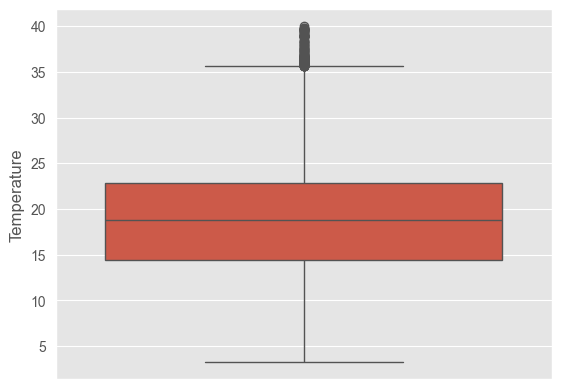

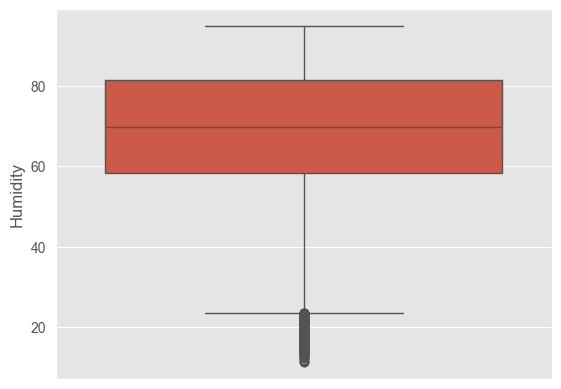

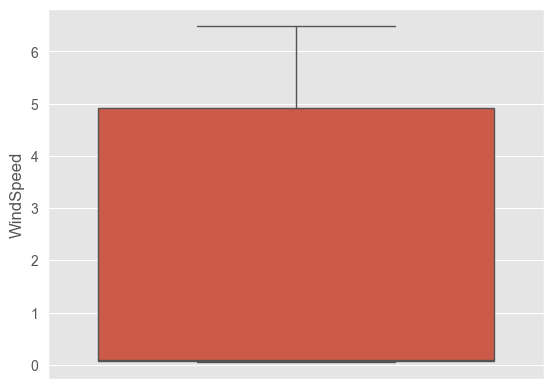

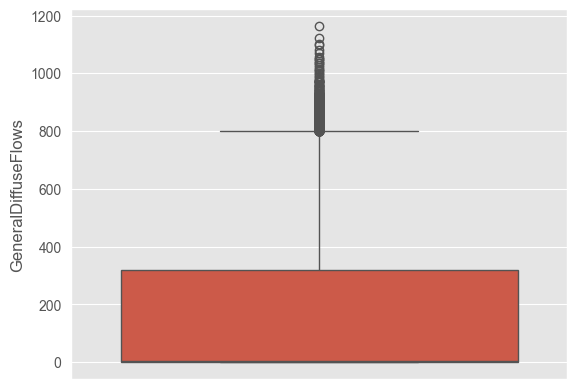

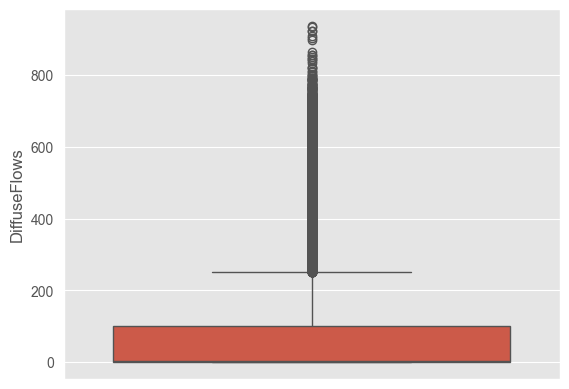

In [36]:
for feature in features:
    sns.boxplot(df[feature])
    plt.show()

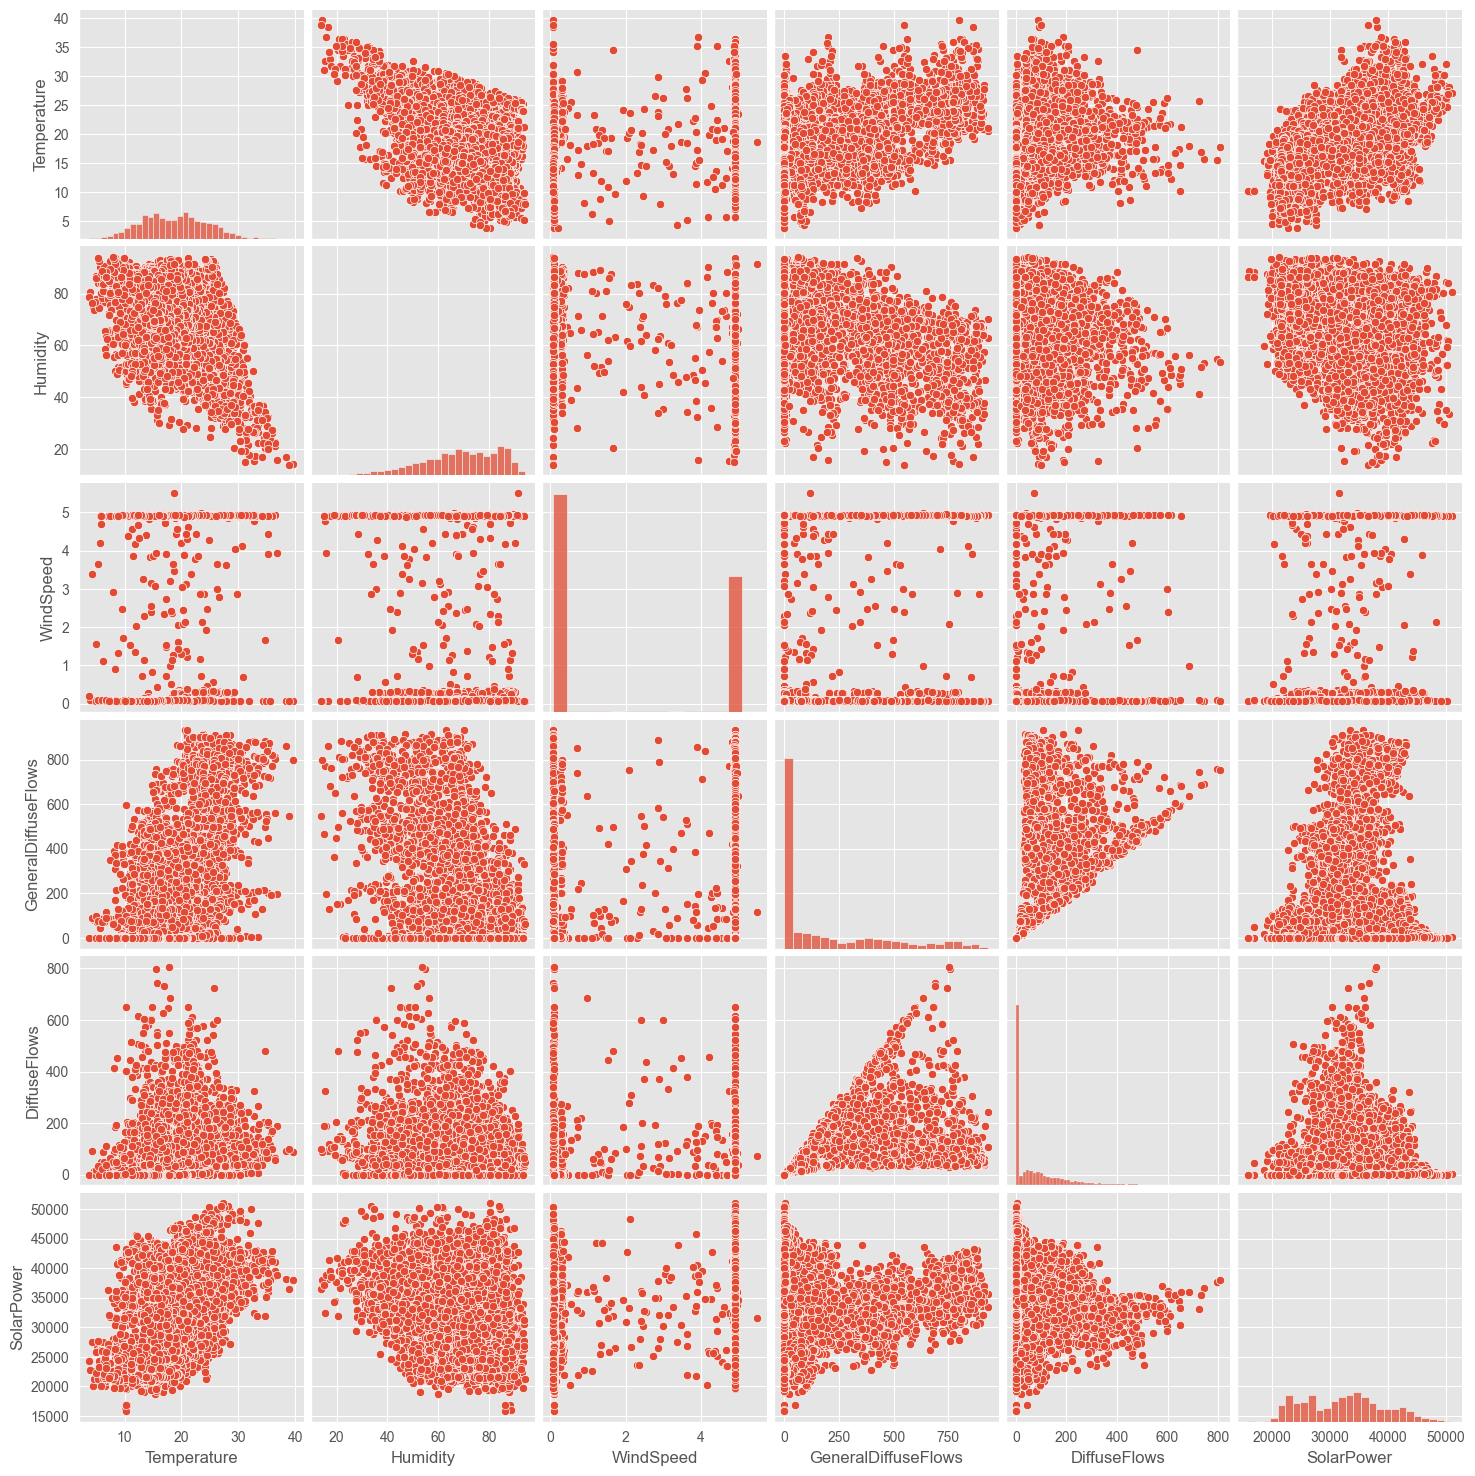

In [37]:
sns.pairplot(df_1)

## Create lags

In [38]:
lag = 4

In [39]:
lags = range(lag, 0, -1)
list(lags)

[4, 3, 2, 1]

In [40]:
df_2 = df_1.copy()

In [43]:
lag_features = features + [target]

In [44]:
for lag in lags:
    for column in lag_features:
        df_2[f"{column}_{lag}"] = df_2[column].shift(lag)
df_2

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower,Temperature_4,Humidity_4,WindSpeed_4,GeneralDiffuseFlows_4,...,WindSpeed_2,GeneralDiffuseFlows_2,DiffuseFlows_2,SolarPower_2,Temperature_1,Humidity_1,WindSpeed_1,GeneralDiffuseFlows_1,DiffuseFlows_1,SolarPower_1
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,5.874636,76.154545,0.081917,0.060167,0.105667,26927.594937,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.874636,76.154545,0.081917,0.060167,0.105667,26927.594937
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987,NaN,NaN,NaN,NaN,...,0.081917,0.060167,0.105667,26927.594937,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545,NaN,NaN,NaN,NaN,...,0.082583,0.061417,0.135083,21447.088607,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,5.874636,76.154545,0.081917,0.060167,...,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 14:00:00,14.513333,39.486364,0.077667,409.650000,42.163333,29293.789606,11.221667,49.004545,0.078417,0.062917,...,0.077000,353.441667,36.275833,29649.683142,14.399167,38.129167,0.077667,489.841667,38.455000,30490.240812
2017-12-30 16:00:00,14.015000,43.236364,0.077500,153.905000,152.368333,31262.864386,11.082500,48.224167,0.078083,76.933417,...,0.077667,489.841667,38.455000,30490.240812,14.513333,39.486364,0.077667,409.650000,42.163333,29293.789606
2017-12-30 18:00:00,10.112500,60.239091,0.075583,1.618917,1.676750,37721.673005,13.382500,43.325000,0.077000,353.441667,...,0.077667,409.650000,42.163333,29293.789606,14.015000,43.236364,0.077500,153.905000,152.368333,31262.864386


In [46]:
df_3 = df_2.dropna()

In [47]:
df_3

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower,Temperature_4,Humidity_4,WindSpeed_4,GeneralDiffuseFlows_4,...,WindSpeed_2,GeneralDiffuseFlows_2,DiffuseFlows_2,SolarPower_2,Temperature_1,Humidity_1,WindSpeed_1,GeneralDiffuseFlows_1,DiffuseFlows_1,SolarPower_1
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,5.874636,76.154545,0.081917,0.060167,...,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 10:00:00,8.019333,63.835833,2.913333,346.072727,34.108333,27986.835442,5.029333,78.008333,0.082583,0.061417,...,0.082417,0.063583,0.122500,20094.683545,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872
2017-01-01 12:00:00,15.263333,57.075000,0.076167,486.391667,40.981667,30060.759495,4.919667,74.641667,0.081667,0.061917,...,0.082417,79.281917,15.761833,21255.189872,8.019333,63.835833,2.913333,346.072727,34.108333,27986.835442
2017-01-01 14:00:00,15.662500,56.914167,0.075667,377.458333,48.125000,29558.481012,4.512750,74.575000,0.082417,0.063583,...,2.913333,346.072727,34.108333,27986.835442,15.263333,57.075000,0.076167,486.391667,40.981667,30060.759495
2017-01-01 16:00:00,15.309167,59.112500,0.077250,160.075833,169.773333,31576.708860,4.632167,73.791667,0.082417,79.281917,...,0.076167,486.391667,40.981667,30060.759495,15.662500,56.914167,0.075667,377.458333,48.125000,29558.481012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 14:00:00,14.513333,39.486364,0.077667,409.650000,42.163333,29293.789606,11.221667,49.004545,0.078417,0.062917,...,0.077000,353.441667,36.275833,29649.683142,14.399167,38.129167,0.077667,489.841667,38.455000,30490.240812
2017-12-30 16:00:00,14.015000,43.236364,0.077500,153.905000,152.368333,31262.864386,11.082500,48.224167,0.078083,76.933417,...,0.077667,489.841667,38.455000,30490.240812,14.513333,39.486364,0.077667,409.650000,42.163333,29293.789606
2017-12-30 18:00:00,10.112500,60.239091,0.075583,1.618917,1.676750,37721.673005,13.382500,43.325000,0.077000,353.441667,...,0.077667,409.650000,42.163333,29293.789606,14.015000,43.236364,0.077500,153.905000,152.368333,31262.864386


In [48]:
df_4 = df_3.drop(columns = features)
df_4

,SolarPower,Temperature_4,Humidity_4,WindSpeed_4,GeneralDiffuseFlows_4,DiffuseFlows_4,SolarPower_4,Temperature_3,Humidity_3,WindSpeed_3,...,WindSpeed_2,GeneralDiffuseFlows_2,DiffuseFlows_2,SolarPower_2,Temperature_1,Humidity_1,WindSpeed_1,GeneralDiffuseFlows_1,DiffuseFlows_1,SolarPower_1
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 08:00:00,21255.189872,5.874636,76.154545,0.081917,0.060167,0.105667,26927.594937,5.029333,78.008333,0.082583,...,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 10:00:00,27986.835442,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607,4.919667,74.641667,0.081667,...,0.082417,0.063583,0.122500,20094.683545,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872
2017-01-01 12:00:00,30060.759495,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,...,0.082417,79.281917,15.761833,21255.189872,8.019333,63.835833,2.913333,346.072727,34.108333,27986.835442
2017-01-01 14:00:00,29558.481012,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545,4.632167,73.791667,0.082417,...,2.913333,346.072727,34.108333,27986.835442,15.263333,57.075000,0.076167,486.391667,40.981667,30060.759495
2017-01-01 16:00:00,31576.708860,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,8.019333,63.835833,2.913333,...,0.076167,486.391667,40.981667,30060.759495,15.662500,56.914167,0.075667,377.458333,48.125000,29558.481012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 14:00:00,29293.789606,11.221667,49.004545,0.078417,0.062917,0.112750,21307.984791,11.082500,48.224167,0.078083,...,0.077000,353.441667,36.275833,29649.683142,14.399167,38.129167,0.077667,489.841667,38.455000,30490.240812
2017-12-30 16:00:00,31262.864386,11.082500,48.224167,0.078083,76.933417,16.230909,23720.152091,13.382500,43.325000,0.077000,...,0.077667,489.841667,38.455000,30490.240812,14.513333,39.486364,0.077667,409.650000,42.163333,29293.789606
2017-12-30 18:00:00,37721.673005,13.382500,43.325000,0.077000,353.441667,36.275833,29649.683142,14.399167,38.129167,0.077667,...,0.077667,409.650000,42.163333,29293.789606,14.015000,43.236364,0.077500,153.905000,152.368333,31262.864386


# Split the dataset into 80% training and 20% testing datasets

In [49]:
x,y= df_4.drop(columns=target), df_4[target]

In [50]:
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [74]:
y_test

Date
2017-10-19 06:00:00    26170.503282
2017-10-19 08:00:00    31223.107219
2017-10-19 10:00:00    35574.091904
2017-10-19 12:00:00    36773.041577
2017-10-19 14:00:00    35413.916849
                           ...     
2017-12-30 14:00:00    29293.789606
2017-12-30 16:00:00    31262.864386
2017-12-30 18:00:00    37721.673005
2017-12-30 20:00:00    36183.523447
2017-12-30 22:00:00    32050.697084
Freq: 2h, Name: SolarPower, Length: 873, dtype: float64

## Create the model, pre-process the data and make it suitable for training

In [51]:
xgb_regressor = XGBRegressor()

In [53]:
xgb_regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Perofrm hyper-parameter optimization with a 5-fold cross validation.

Important: Do not use many values for the hyper-parameters due to time constraints.

KEEP IN MIND THE DATASET IS TIME-SERIES.

In [55]:
params_grid = {
    "n_estimators": [2, 4, 6, 8, 10],
    "max_depth": [6, 8, 10, 12, None],
    "random_state":[42]
}

In [66]:
grid_search_cv = GridSearchCV(estimator=XGBRegressor(), param_grid=params_grid, cv=TimeSeriesSplit(n_splits=5),scoring="r2")

In [67]:
grid_search_cv.fit(x_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [6, 8, 10, 12, None],
                         'n_estimators': [2, 4, 6, 8, 10],
                         'random_state': [42]},
             scoring='r2')

## Fit the model with the best parameters on the training dataset

In [68]:
grid_search_cv.best_params_

{'max_depth': 6, 'n_estimators': 10, 'random_state': 42}

In [69]:
model = grid_search_cv.best_estimator_

In [70]:
y_pred = model.predict(x_test)

In [75]:
regression_report(y_test, y_pred, include_mae=True)

Regression Report:
Mean Square Error: 3776267.6380614755
Mean Absolute Error: 1504.4445650498758
R2 Score: 0.8944146734819161


## Visualize the targets against the predictions

<Axes: xlabel='Date'>

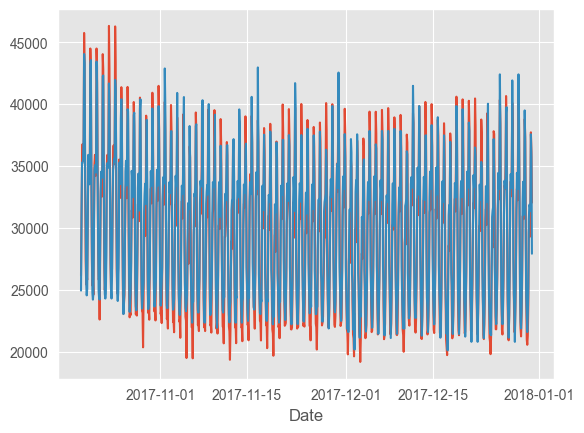

In [73]:
sns.lineplot(x=y_test.index, y=y_test.values)
sns.lineplot(x=y_test.index, y=y_pred.flatten())

# LSTM


In [76]:
x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

In [77]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))

In [80]:
x_train_scaled_shaped = x_train_scaled.reshape((x_train_scaled.shape[0], lag, (x_train_scaled.shape[1] // lag)))
x_test_scaled_shaped = x_test_scaled.reshape((x_test_scaled.shape[0], lag, (x_test_scaled.shape[1] // lag)))

In [83]:
model = Sequential([
    Input((x_train_scaled_shaped.shape[1], x_train_scaled_shaped.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])

In [84]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │        22,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,233 (137.63 KB)

 Trainable params: 35,233 (137.63 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [86]:
history = model.fit(x_train_scaled_shaped, y_train_scaled, validation_split=0.20, epochs=16, batch_size=64, shuffle=False)

Epoch 1/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1853 - mean_squared_error: 0.1853 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 2/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 3/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 4/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 5/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 6/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 7/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0157 - val_mean_

<Axes: >

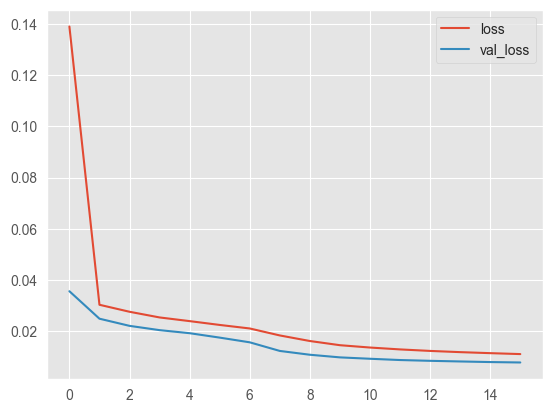

In [87]:
## Plot the loss function on the training and validation dataset
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [88]:
## Calculate the adequate metrics
pred_y_scaled = model.predict(x_test_scaled_shaped)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [89]:
pred_y_lstm = y_scaler.inverse_transform(pred_y_scaled)

In [90]:
regression_report(y_test,pred_y_lstm)

Regression Report:
Mean Square Error: 9057257.068341427
R2 Score: 0.7467569736635586
